Temos aqui uma base de imóveis para alugar, vou desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

In [5]:
#A) Verificar os tipos de dados
print(df.dtypes)

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object


In [6]:
#B) Verificar dados faltantes
print(df.isnull().sum())

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


In [8]:
#A) Exibir estatísticas descritivas das variáveis numéricas
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


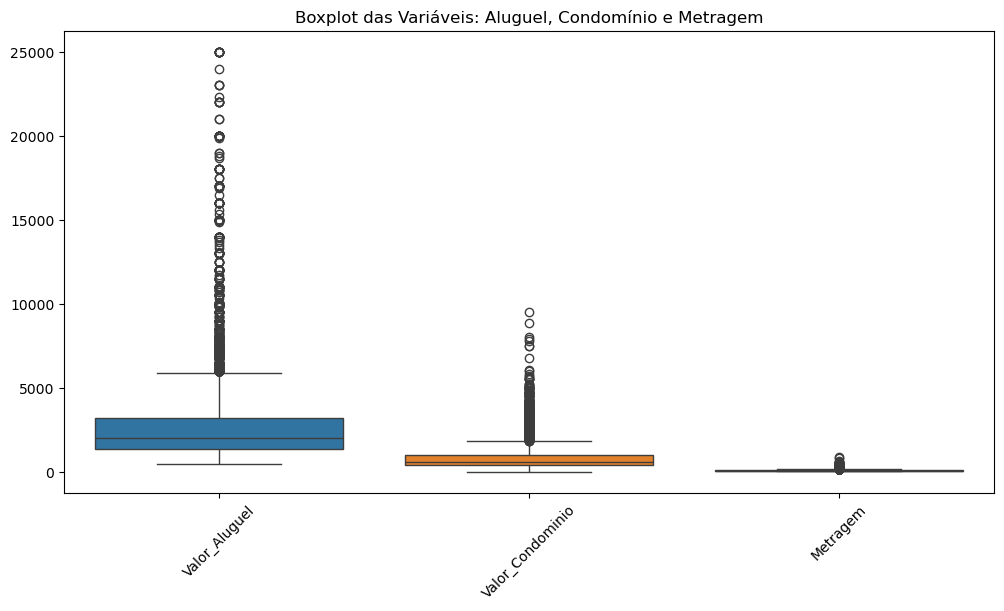

In [9]:
#B) Criar um boxplot para visualizar outliers nas variáveis principais
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["Valor_Aluguel", "Valor_Condominio", "Metragem"]])
plt.xticks(rotation=45)
plt.title("Boxplot das Variáveis: Aluguel, Condomínio e Metragem")
plt.show()

In [10]:
# Verifica a quantidade de valores menores ou iguais a zero nas colunas de aluguel, condomínio e metragem.
# Isso ajuda a identificar possíveis erros ou dados inválidos no conjunto de dados.
print("Valores <= 0 em Valor_Aluguel:", df[df["Valor_Aluguel"] <= 0].shape[0])
print("Valores <= 0 em Valor_Condominio:", df[df["Valor_Condominio"] <= 0].shape[0])
print("Valores <= 0 em Metragem:", df[df["Metragem"] <= 0].shape[0])

Valores <= 0 em Valor_Aluguel: 0
Valores <= 0 em Valor_Condominio: 638
Valores <= 0 em Metragem: 0


In [11]:
# Verificar a proporção de valores zero em Valor_Condominio
print("Proporção de valores zero em Valor_Condominio:", df[df["Valor_Condominio"] ==0].shape[0] / df.shape[0])

Proporção de valores zero em Valor_Condominio: 0.088574205192281


insight: Como os valores iguais a 0 representa 8% dos meus dados vou subintituir pela mediana

In [13]:
# Subistituir os valores 0 pela mediana, pois acredito que eles possam distorcer os dados 
# Obtando pela mediana porque ela é menos sensíveis a outliers
df["Valor_Condominio"] = df["Valor_Condominio"].replace(0, df["Valor_Condominio"].median())

In [96]:
# Aplicar logaritmo nas variáveis com transformação
# Usei a trasformação logaritma porque ela normaliza a distribuição e melhora o desempenho do modelo de regressão
df["Valor_Aluguel_Log"] = np.log(df["Valor_Aluguel"])
df["Valor_Condominio_Log"] = np.log(df["Valor_Condominio"] + 1)  # Evitar log(0) somando 1
df["Metragem_Log"] = np.log(df["Metragem"])

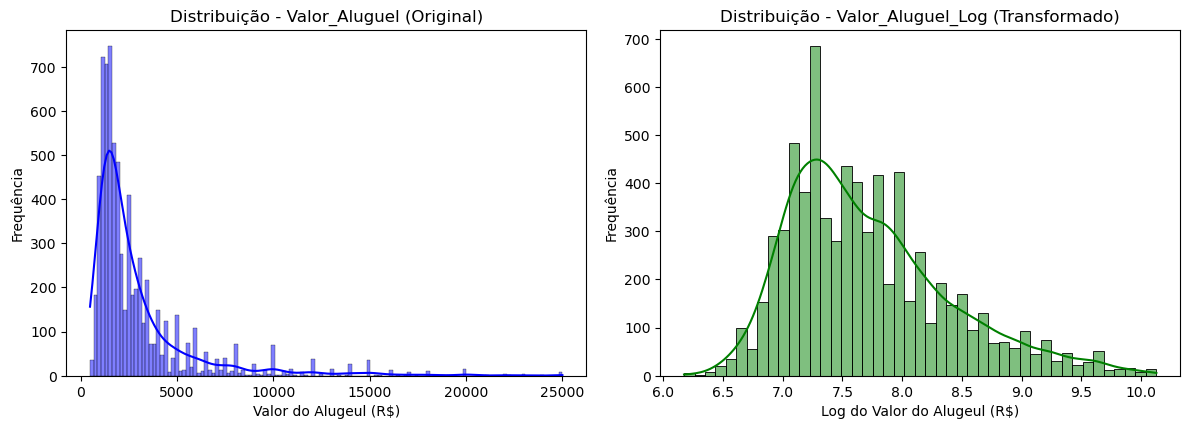

In [108]:
# Visualizar o antes e depois do tratamento logaritimo
# Configuração da figura com 2 linhas e 2 colunas
plt.figure(figsize=(12, 8))

# Gráfico 1 - Valor_Aluguel (Antes e Depois)
plt.subplot(2, 2, 1)
sns.histplot(df["Valor_Aluguel"], kde=True, color='blue')
plt.title("Distribuição - Valor_Aluguel (Original)")
plt.xlabel("Valor do Alugeul (R$)")
plt.ylabel("Frequência")

plt.subplot(2, 2, 2)
sns.histplot(df["Valor_Aluguel_Log"], kde=True, color='green')
plt.title("Distribuição - Valor_Aluguel_Log (Transformado)")
plt.xlabel("Log do Valor do Alugeul (R$)")
plt.ylabel("Frequência")

# Ajustar layout
plt.tight_layout()
plt.show()

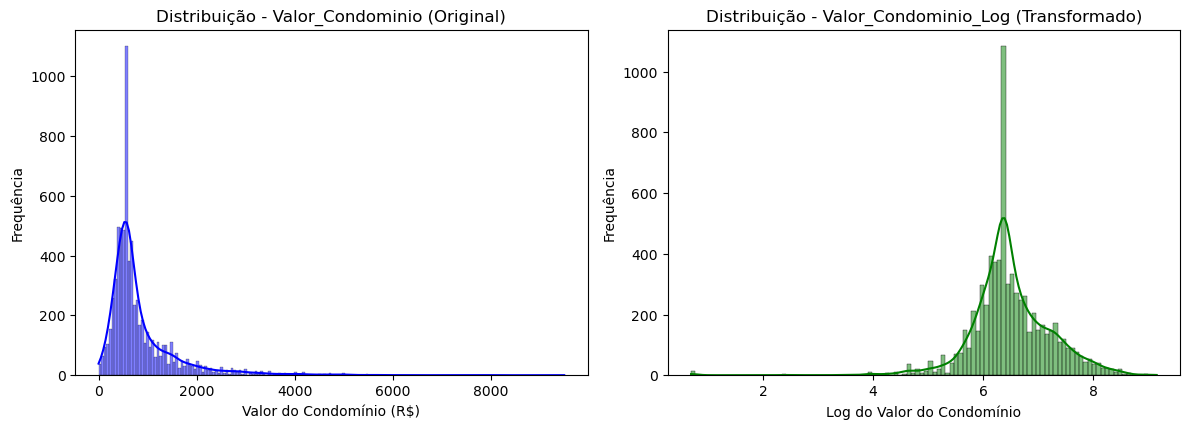

In [106]:
# Gráfico 2 - Valor_Condominio (Antes e Depois)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df["Valor_Condominio"], kde=True, color='blue')
plt.title("Distribuição - Valor_Condominio (Original)")
plt.xlabel("Valor do Condomínio (R$)")
plt.ylabel("Frequência")


plt.subplot(2, 2, 2)
sns.histplot(df["Valor_Condominio_Log"], kde=True, color='green')
plt.title("Distribuição - Valor_Condominio_Log (Transformado)")
plt.xlabel("Log do Valor do Condomínio")
plt.ylabel("Frequência")


# Ajustar layout
plt.tight_layout()
plt.show()

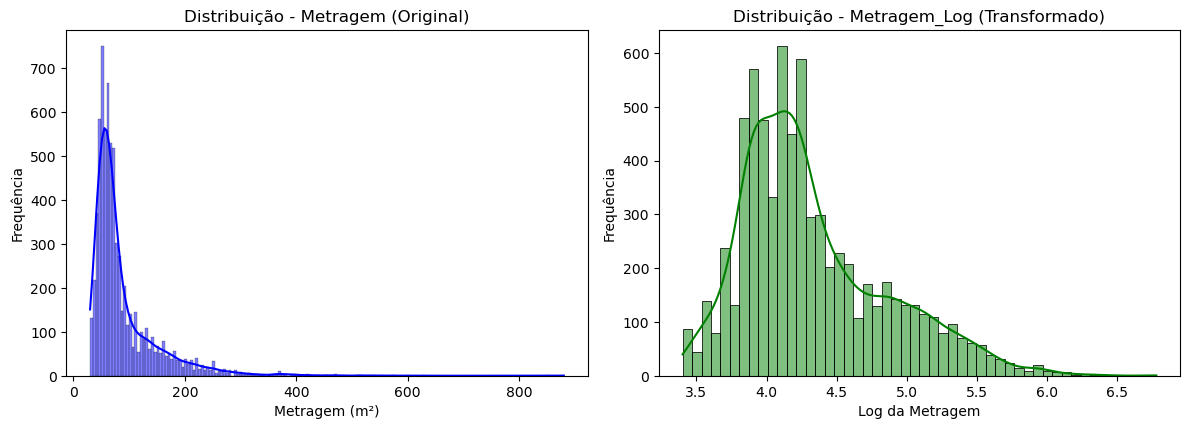

In [104]:
# Gráfico 3 - Metragem (Antes e Depois)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df["Metragem"], kde=True, color='blue')
plt.title("Distribuição - Metragem (Original)")
plt.xlabel("Metragem (m²)")
plt.ylabel("Frequência")


plt.subplot(2, 2, 2)
sns.histplot(df["Metragem_Log"], kde=True, color='green')
plt.title("Distribuição - Metragem_Log (Transformado)")
plt.xlabel("Log da Metragem")
plt.ylabel("Frequência")


# Ajustar layout
plt.tight_layout()
plt.show()

Insight: A transformação logarítmica ajudou a reduzir a assimetria das distribuições, especialmente para Valor_Aluguel e Valor_Condominio, o que pode melhor o desempenho do modelo de regressão

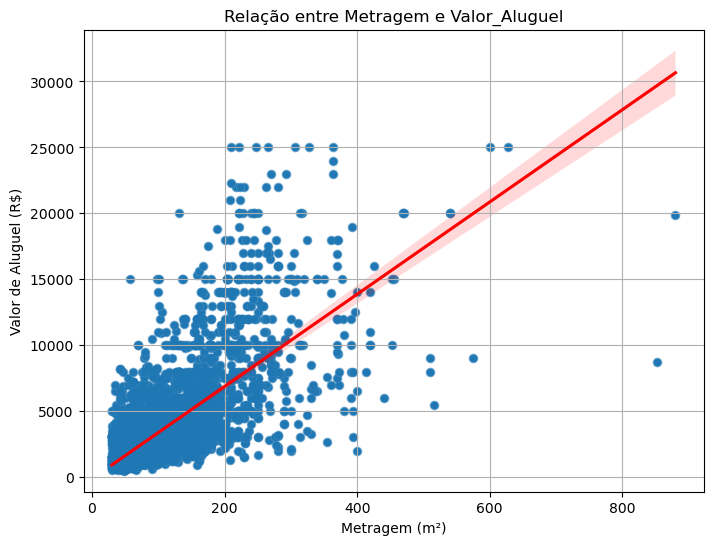

In [20]:
#C) Gráfico de dispersão entre Metragem e Valor_Aluguel
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Metragem"], y=df["Valor_Aluguel"])
sns.regplot(x=df['Metragem'], y=df['Valor_Aluguel'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Relação entre Metragem e Valor_Aluguel")
plt.xlabel("Metragem (m²)")
plt.ylabel("Valor de Aluguel (R$)")
plt.grid(True)
plt.show()


Relação Positiva: Existe uma tendência de que imóveis com maior metragem tenham valores de aluguel mais altos, indicando uma correlação positiva entre as variáveis.

Maior Concentração em Metragens Menores: A maioria dos imóveis tem até 200 m², com a maior parte dos aluguéis variando entre R$ 0 e R$ 10.000.

Alta Dispersão em Grandes Metragens: Para imóveis acima de 200 m², os valores de aluguel se tornam mais dispersos, indicando que outros fatores, como localização e infraestrutura, podem ter um grande impacto nos preços.


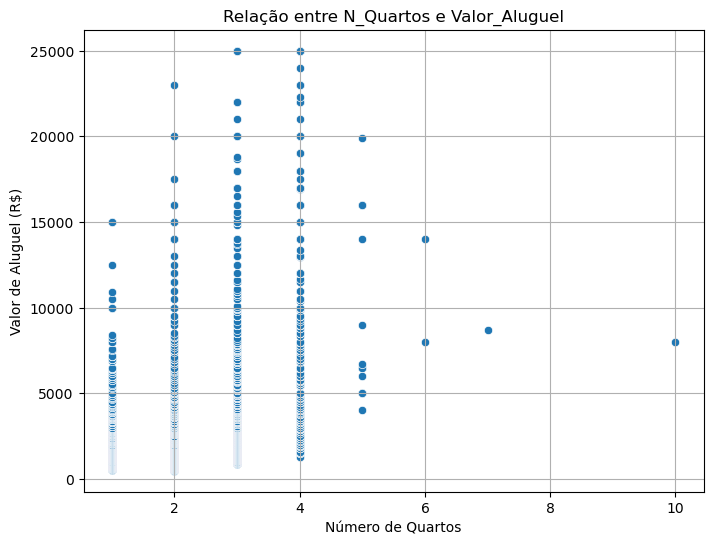

In [22]:
# Gráfico de dispersão entre N_Quartos e Valor_Aluguel
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["N_Quartos"], y=df["Valor_Aluguel"])
plt.title("Relação entre N_Quartos e Valor_Aluguel")
plt.xlabel("Número de Quartos")
plt.ylabel("Valor de Aluguel (R$)")
plt.grid(True)
plt.show()

Tendência Positiva: O número de quartos parece ter uma relação positiva com o valor do aluguel, ou seja, imóveis com mais quartos tendem a ter aluguéis mais altos.

Maior Dispersão em Valores Elevados: Para imóveis com 2 a 4 quartos, há uma grande variação no valor do aluguel, indicando que outros fatores (como localização, metragem e infraestrutura) também influenciam no preço.



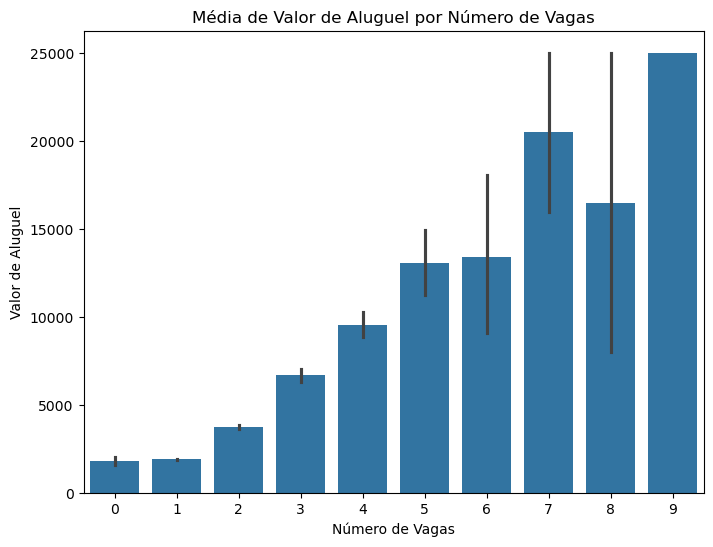

In [29]:
# Gráfico 3: Barplot entre N_Vagas e Valor_Aluguel
plt.figure(figsize=(8, 6))
sns.barplot(x='N_Vagas', y='Valor_Aluguel', data=df)
plt.title('Média de Valor de Aluguel por Número de Vagas')
plt.xlabel('Número de Vagas')
plt.ylabel('Valor de Aluguel')
plt.show()

Insight: A metragem e o número de vagas de garagem apresentam uma relação linear positiva com o valor do aluguel, ou seja, à medida que a metragem do imóvel e a quantidade de vagas aumentam, o valor do aluguel também tende a subir.









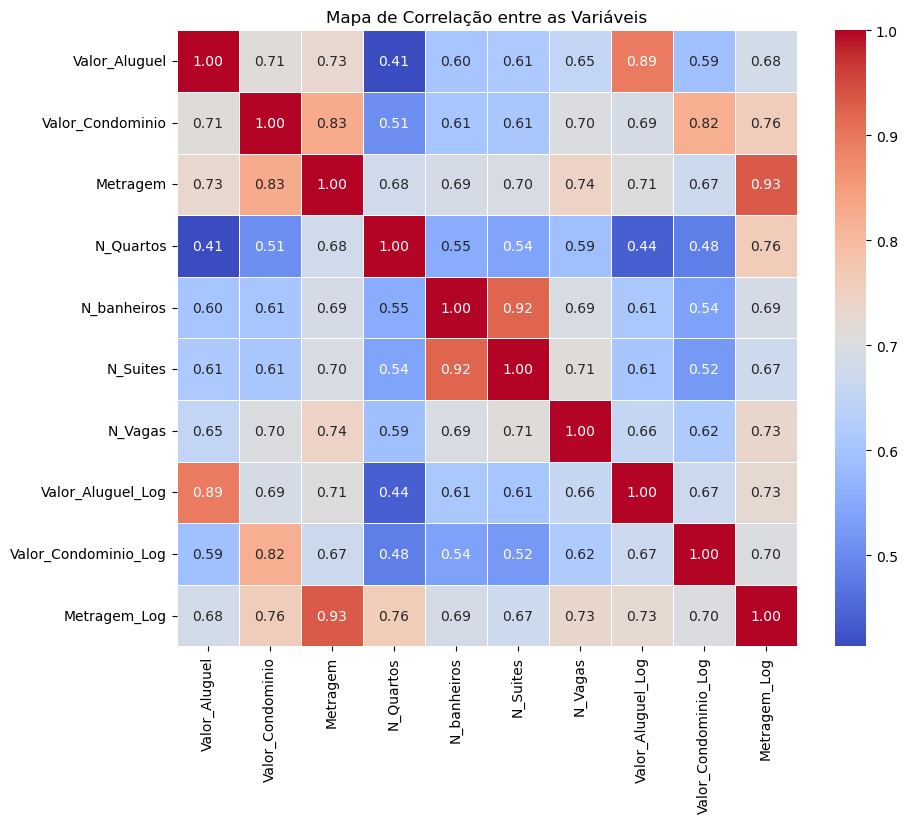

Correlação com Valor_Aluguel:
Valor_Aluguel           1.000000
Valor_Aluguel_Log       0.893609
Metragem                0.730591
Valor_Condominio        0.712736
Metragem_Log            0.683045
N_Vagas                 0.652858
N_Suites                0.614397
N_banheiros             0.603715
Valor_Condominio_Log    0.593596
N_Quartos               0.413139
Name: Valor_Aluguel, dtype: float64


In [38]:
# Vamos identificar a vareavel que têm maior influência no valor do aluguel

#A) Calcular a matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()

# Identificar as correlações mais fortes com a variável 'Valor_Aluguel'
correlation_with_rent = correlation_matrix["Valor_Aluguel"].sort_values(ascending=False)

# Exibir as variáveis mais fortes em correlação com 'Valor_Aluguel'
print("Correlação com Valor_Aluguel:")
print(correlation_with_rent)


Insight: As variáveis Metragem, Valor_Condominio, e N_Vagas têm as correlações mais fortes com Valor_Aluguel.

In [42]:
# X são as variáveis que usaremos para prever, y é o valor que queros prever
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

In [111]:
# Dividindo os dados em treino e teste para evitar overfitting e avaliar o modelo em dados não vistos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando o tamanho das divisões
print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")

Tamanho do conjunto de treino (X_train): (5762, 9)
Tamanho do conjunto de teste (X_test): (1441, 9)


In [113]:
#A) Usando apenas a variável Metragem para regressão linear simples
# Selecionando a variável independende (Metragem) para o modelo simples
X_train_simple = X_train[['Metragem']]
X_test_simple = X_test[['Metragem']]

# Criando e treinando o modelo de regressão liner
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)


LinearRegression()

In [115]:
# B) Exibindo o intercepto e o coeficiente 
print(f"Intercept: {model_simple.intercept_}")
print(f"Coefficient: {model_simple.coef_[0]}")

# Montando a  Equação da reta
print(f"Equação da reta: y = {model_simple.intercept_} + {model_simple.coef_[0]} * Metragem")

Intercept: -96.99896039931855
Coefficient: 34.47397089324868
Equação da reta: y = -96.99896039931855 + 34.47397089324868 * Metragem


Nossa equação seria:  

In [117]:
# C) Calculando o R² no conjunto de teste
r2_test = model_simple.score(X_test_simple, y_test)
print(f"R² no teste: {r2_test}")

R² no teste: 0.5697993791211697


Insight: O R² no treino e no teste são próximos, o que surgere que o modelo não esta superajustado. no entanto, o valor de R² é moderado, indicando que a metragem sozinha não explica completamente a variação no valor do aluguel.

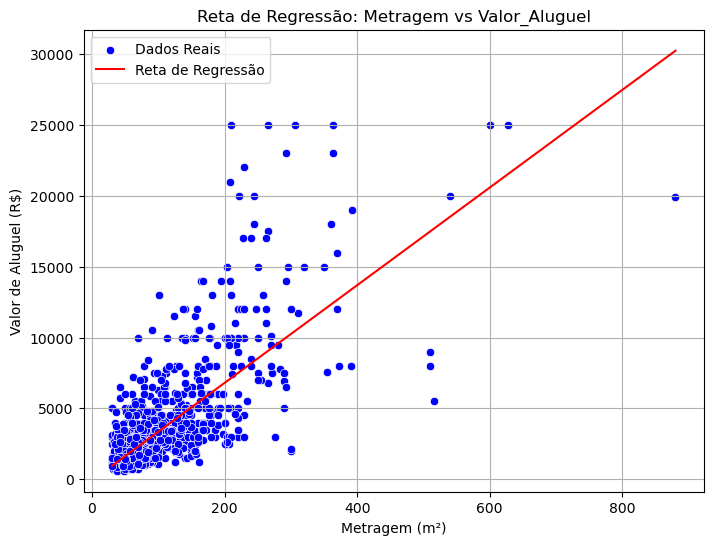

In [127]:
# D) Plotando o Gráfico da reta de regressão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_simple['Metragem'], y=y_test, color='blue', label='Dados Reais')
sns.lineplot(x=X_test_simple['Metragem'], y=y_pred_simple, color='red', label='Reta de Regressão')
plt.title("Reta de Regressão: Metragem vs Valor_Aluguel")
plt.xlabel("Metragem (m²)")
plt.ylabel("Valor de Aluguel (R$)")
plt.grid(True)
plt.legend()
plt.show()

In [66]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [129]:
# E) Aplicando o modelo na base de teste
# Fazendo previsões no conjunto de teste
y_pred_test = model_simple.predict(X_test_simple)

# Calculando o R² na base de teste
r2_test_final = r2_score(y_test, y_pred_test)
print(f"R² na base de teste: {r2_test_final:.4f}")

# Calculando o Erro Quadrático Médio (MSE) para uma avaliação adicional
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Erro Quadrático Médio (MSE) na base de teste: {mse_test:.2f}")

R² na base de teste: 0.5698
Erro Quadrático Médio (MSE) na base de teste: 4659582.48


 Vimos que o valor de teste e o de treino pernameceu o mesmo isso nos mostra que ele generaliza bem para novos dados, porem 56,98% ainda que para uma unica variavel seja um numero consideravel ainda temos quase a metade dos dados sem explicação isso surgere que precisamos fazer uma regressão com mais variáveis para explicar melhor o valores do alugeis 

In [133]:
# Separando as variáveis independentes (X) e dependende (y)
X = df.drop ('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

#Dividindo os dados em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Criando e treinando o modelo de regressão linear mútipla 
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [139]:
# C) Calculando o R² no conjuntp de treino 
r2_train_multiple = model_multiple.score(X_train, y_train)
print(f"R² no teste (Regressão Mútipla): {r2_train_multiple}")

R² no teste (Regressão Mútipla): 0.8455502502193715


In [141]:
# D) Aplicando o modelo na base de teste e calculando o R² no teste
r2_test_multiple = model_multiple.score(X_test, y_test)
print(f"R² no teste (Regressão Múltipla): {r2_test_multiple}")


R² no teste (Regressão Múltipla): 0.8436372454298418


Insight: O modelo de regressão múltipla tem um R² maior, indicando que ele é mais adequado para 
prever o valor do aluguel. Isso ocorre porque ele leva em consideração mais variáveis que têm impacto
no valor do aluguel, como o número de quartos, banheiros, suites, e vagas.